In [105]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

path = "./geni.csv"

In [106]:

#get the datas
with open(path) as f:
    raw_datas = f.read()
    first_elaboration = raw_datas.split("\n")

act_datas={}
for d in first_elaboration:
    if(d!=''):
        tmp = d.split(";")
        if tmp[0] in act_datas.keys():
            act_datas[tmp[0]].append((tmp[0],tmp[1]))
        else:
            act_datas[tmp[0]] = [(tmp[0],tmp[1])]

#act_datas

In [121]:
G = nx.Graph()
nodes = act_datas.keys()
G.add_nodes_from(act_datas.keys())
colors = ["red","blue", "green"]
for k in nodes:
    i = int(k)%len(colors)
    G.add_edges_from(act_datas[k])

[('1', '2'), ('1', '3')]
('1', '3') ('1', '2')
[('2', '4')]


IndexError: list index out of range

In [108]:
print("Numero di nodi: "+str(G.number_of_nodes()))
print("Numero di archi: "+str(G.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(G)))
print("Componenti connesse: "+ str(nx.number_connected_components(G)))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G))




Numero di nodi: 291
Numero di archi: 279
Il grafo è connesso? False
Componenti connesse: 32


Il grafo non è connesso

In [109]:
lista_componenti_connesse


[{'1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9'},
 {'25', '26', '27', '28', '29', '30'},
 {'31', '32'},
 {'33', '34'},
 {'35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49'},
 {'50', '51'},
 {'52', '53'},
 {'54', '55'},
 {'56', '57'},
 {'58', '59', '60', '61', '62'},
 {'63', '64'},
 {'65', '66'},
 {'100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '129',
  '130',
  '131',
  '132',
  '133',
  '134',
  '135',
  '136',
  '137',
  '138',
  '139',
  '140',
  '141',
  '142',
  '143',
  '144',
  '145',
  '146',
  '147',
  '148',
  '149',
  '150',
  '151',
  '152',
  '153',
  '154',
  '155',

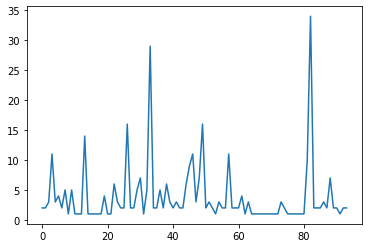

In [110]:
degrees = []
for n in nodes:
    degrees.append(G.degree[n])
plt.plot(degrees)
plt.show()



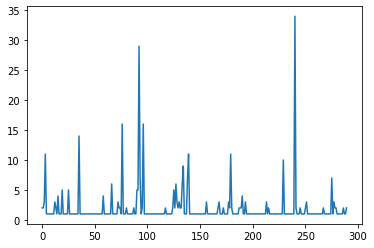

In [111]:
degrees = []
i = 1
while i < 291:
    n = str(i)    
    if G.has_node(n):
        d = G.degree[n]
        degrees.append(d)
    else:
        degrees.append(-30)
    i+=1
plt.plot(degrees)
plt.show()

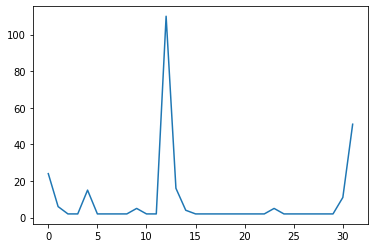

In [112]:
connected_components_sizes = []
for l in lista_componenti_connesse:
    connected_components_sizes.append(len(l))
plt.plot(connected_components_sizes)
plt.show()

In [113]:
max_degree_node = max(G.nodes, key=G.degree)
print(max_degree_node)
len(act_datas[max_degree_node])


241


34

In [114]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [115]:
print("Numero di nodi: "+str(G0.number_of_nodes()))
print("Numero di archi: "+str(G0.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(G0)))
print("Componenti connesse: "+ str(nx.number_connected_components(G0)))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G0))

print("Diff nodi: "+str(G.number_of_nodes()-G0.number_of_nodes()))
print("Diff archi: "+str(G.number_of_edges()-G0.number_of_edges()))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G0))

Numero di nodi: 110
Numero di archi: 124
Il grafo è connesso? True
Componenti connesse: 1
Diff nodi: 181
Diff archi: 155


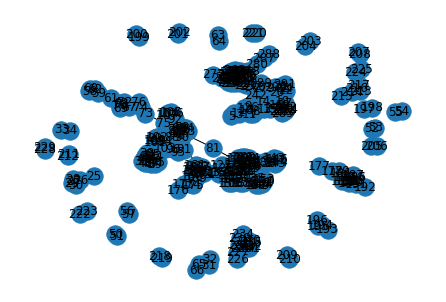

In [120]:
nx.draw(G, with_labels=True)

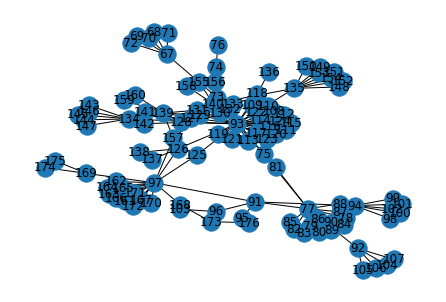

In [117]:
nx.draw(G0, with_labels=True)

In [118]:
nx.edge_betweenness_centrality(G)

{('1', '2'): 0.00028439388553146107,
 ('1', '3'): 0.0003080933759924162,
 ('2', '4'): 0.0007346842042896078,
 ('3', '5'): 0.0005450882806019671,
 ('3', '4'): 0.0012086740135087096,
 ('4', '6'): 0.0005450882806019671,
 ('4', '7'): 0.0005450882806019671,
 ('4', '8'): 0.0005450882806019671,
 ('4', '9'): 0.0005450882806019671,
 ('4', '10'): 0.0005450882806019671,
 ('4', '11'): 0.0005450882806019671,
 ('4', '12'): 0.0005450882806019671,
 ('4', '13'): 0.00255954496978315,
 ('4', '14'): 0.00255954496978315,
 ('13', '15'): 0.0005450882806019671,
 ('13', '16'): 0.0018959592368764074,
 ('16', '17'): 0.0005450882806019671,
 ('16', '18'): 0.0005450882806019671,
 ('16', '19'): 0.0005450882806019671,
 ('14', '20'): 0.002251451593790734,
 ('20', '21'): 0.0005450882806019671,
 ('20', '22'): 0.0005450882806019671,
 ('20', '23'): 0.0005450882806019671,
 ('20', '24'): 0.0005450882806019671,
 ('25', '26'): 0.00011849745230477546,
 ('26', '27'): 0.00011849745230477546,
 ('26', '28'): 0.00011849745230477546

In [119]:
print("Densità: "+str(nx.density(G)))

Densità: 0.00661215783860647
